# **Classification III Lab: Working with classifiers**

Author: Vanessa Gómez Verdejo (http://vanessa.webs.tsc.uc3m.es/)

Updated: 07/02/2017 (working with sklearn 0.18.1)

In this lab session we are going to continue working with classification algorithms, mainly, we are going to focus on decision trees and their use in ensembles. 

#### ** During this lab we will cover: **
#### * Part 1: Trees*
#### * Part 2: Random forests*
#### * Part 3: Ensembles of classifiers: bagging and boosting*


In [1]:
%matplotlib inline

### ** Part 0: Load and preprocess data**

In the following sections, we are going to use all input features of the Iris dataset. So, let's start running the following cell to load the complete Iris data.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the random generator seed to compare results
np.random.seed(0)

iris = datasets.load_iris()
X = iris.data # All input features are used
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ** Part 1: Trees**


#### ** 1.1: Training a decision Tree**

Decision Trees learn simple decision rules selecting iteratively a input feature and setting a threshold over it, so they are simple tool, easy to understand and interpret.

Use the [DecisionTreeClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) function to train a decision tree. Although the tree depth is usually a parameter to select, here we are working with only for input features, so you can use all default parameter and obtain a good performance. Complete the following code to return in the variable acc\_tree the tree accuracy.

In [3]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,Y_train)
acc_tree= clf_tree.score(X_test,Y_test)

print("The test accuracy of the decision tree is %2.2f" %(100*acc_tree))

The test accuracy of the decision tree is 95.00


In [4]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_tree, 2), 0.95 , 'incorrect result: The value of C_opt is uncorrect')

1 test passed.


#### ** 1.2: Analyzing the results**

Here, let us analyze the structure of the trained tree. For this purpose, you may need install some libraries (in class computers is alredy installed). 

Please, follow these steps:

1. Check that you are working with scikit-learn 0.18.1 You can checked this from a python terminal:
        >> import sklearn
        >> sklearn.\__version\__
    
   If it is necessary, you can upgrade sklearn from a terminal with: 
       >> pip install --upgrade scikit-learn
   
2. Go to a terminal and run the following command lines:

   2.A. For MAC user:
        >> pip install pydotplus
        >> brew install graphviz
        >> pip install graphviz
        
        Note: to install brew 
        >> /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
        
   2.B. For Linux users:
       >> Install Graphviz:
           ** (In Fedora / Centos)  >> sudo dnf -y install graphviz
           ** (Ubuntu / Debian) >> sudo apt-get install graphviz
       >> pip install graphviz
       >> pip install pydotplus
       
You have to restart the notebook kernel to make this changes work. Then, run the following cell to visualize the tree structure.

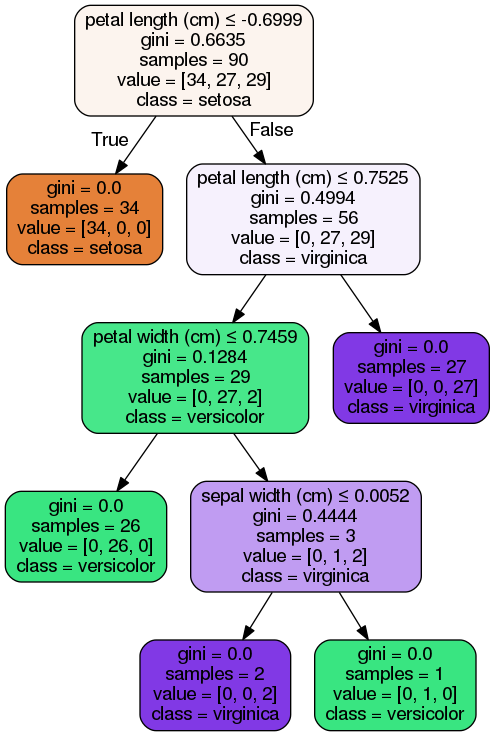

In [5]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

Try to use the following [example](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py) of the scikit-learn help, to plot the classification regions for different pairs of input features. Modify the necessary code line to plot our training data over the decision regions.

Be careful, this examples retrains different classifiers for each pair of input features; therefore, its solution differs from the above one that we have just computed.

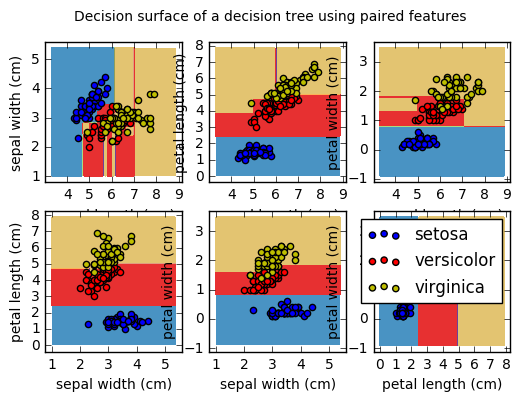

In [27]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
import matplotlib.pyplot as plt

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


### ** Part 2: Random Forest**

#### ** 2.1: Training a Random Forest**

A Random Forest (RF) trains several decision tree classifiers, where each one is trained with different samples and features of the training data, and averages their outputs to improve the final accuracy.

Use the [RandomForestClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function to train a RF classifier and select by cross validation the number of trees to use. The remaining parameters, such as the number of subsampled data or features, can be used with their default values. Return the optimal number of trees to be used and the final accuracy of the RF classifier.

In [12]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rang_n_trees=np.arange(1,10)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 10

clf_RF  = RandomForestClassifier()
clf_RF = GridSearchCV(clf_RF, tuned_parameters, cv=nfold)
clf_RF.fit(X_train,Y_train)
n_trees_opt = clf_RF.best_params_['n_estimators']
acc_RF = clf_RF.score(X_test,Y_test)

print "The number of selected trees is " + str(n_trees_opt)
print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

The number of selected trees is 1
The test accuracy of the RF is 91.67


Run the above code again, do you obtain the same accuracy? 

#### ** 2.2: Obtaining results statistically significant**

Random forest have a random component when the training data are subsampled, so you can obtain a different result for different runnings of the algorithm. In this case, to be able to provide a statistically significant measurement of the performance of the classifier, we need to average the result over a large number of runs.

Complete the following code, to train again the RF classifier, but averaging its test accuracies over 50 runs. Provide its average accuracy and the average number of selected trees (include their standard deviations). 

In [13]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to be able to check test results
np.random.seed(0)

print 'This can take a some minutes, be patient'
# Create RF classifier object with CV
clf_RF  = RandomForestClassifier()
clf_RF = GridSearchCV(clf_RF, tuned_parameters, cv=nfold)

acc_RF_vector=[]
n_trees_vector=[]
for run in np.arange(50):
    # For each run, train it, compute its accuracy and examine the number of optimal trees
    clf_RF.fit(X_train,Y_train)
    acc = clf_RF.score(X_test,Y_test)
    acc_RF_vector.append(acc)
    n_trees = clf_RF.best_params_['n_estimators']
    n_trees_vector.append(n_trees)
    
# Compute averaged accuracies and number of used trees
mean_acc_RF = np.mean(acc_RF_vector) 
std_acc_RF = np.std(acc_RF_vector) 

mean_n_trees = np.mean(n_trees_vector)
std_n_trees = np.std(n_trees_vector) 

# Print the results
print('Averaged accuracy for RF classifier is %2.2f +/- %2.2f '%(100*mean_acc_RF, 100*std_acc_RF))
print('Averaged number of selected trees is %2.2f +/- %2.2f '%(mean_n_trees, std_n_trees))

This can take a some minutes, be patient
Averaged accuracy for RF classifier is 91.30 +/- 3.40 
Averaged number of selected trees is 3.40 +/- 2.42 


In [14]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(mean_acc_RF, 2), 0.91 , 'incorrect result: The value of mean_acc_RF is uncorrect')
Test.assertEquals(np.round(std_acc_RF, 4), 0.034 , 'incorrect result: The value of std_acc_RF is uncorrect')
Test.assertEquals(np.round(mean_n_trees, 2), 3.40 , 'incorrect result: The value of mean_n_trees is uncorrect')
Test.assertEquals(np.round(std_n_trees, 2), 2.42 , 'incorrect result: The value of std_n_trees is uncorrect')

1 test passed.
1 test passed.
1 test passed.
1 test passed.


### ** Part 3: Ensembles**
The goal of ensemble methods is to combine the predictions of several base estimators or learners to obtain a classifier of improved performance. We are going to work with two ensemble methods:

* Bagging methods: their driving principle is to build several estimators with diversity among them and then to average their predictions. 
* Boosting methods: in this case, base estimators are built sequentially forcing new learners to pay more attention to samples missclassified by previous learners. 


#### ** 3.1. Bagging methods**

Here, to implement bagged classifiers, we are going to use [BaggingClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) object which includes different degrees of freedom in the learners design: with or without samples replacement, selecting random subsets of features instead of samples or selecting subsets of both samples and features. 

For the sake of simplicity, we are going to use as base learner a decision stump (i.e., a decision tree with one depth level). Note that in the case of using decision trees as learners, the resulting ensemble results in a random forest. 

Complete the following code to train a ensemble of bagged decision stumps. Set max\_samples (percentage of training data used to train each learner) and max\_features parameters (percentage of input features used to train each learner) to 0.5, and fix to 10 the number of learners used.

In [16]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
np.random.seed(0)
base_learner = tree.DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(base_learner, max_samples=0.5, max_features=0.5, n_estimators=10)
bagging.fit(X_train,Y_train)
acc_test = bagging.score(X_test,Y_test)

print('Accuracy of bagged ensemble is %2.2f '%(100*acc_test))

Accuracy of bagged ensemble is 88.33 


In [17]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_test, 2), 0.88 , 'incorrect result: The value final of acc_test is uncorrect')

1 test passed.


Analyze the final ensemble performance according to the number of learners. Average the result over 20 or more different runs to obtain statically significant results (note that the above accuracy change if we hadn't set the seed and we run it several times).

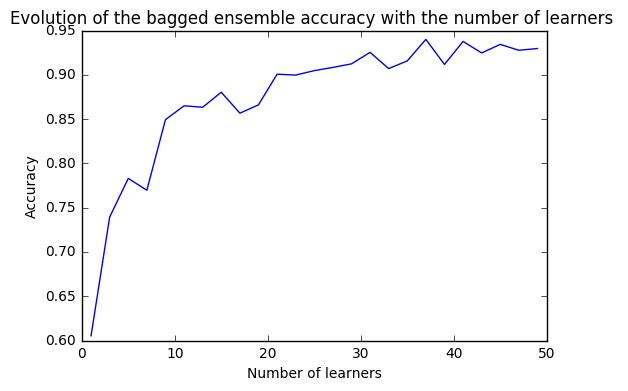

In [20]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

acc_test_evol = []
rang_n_learners = range(1,50,2)
for n_learners in rang_n_learners:
    acc_test_run=[]
    for run in range(50):
        bagging = BaggingClassifier(base_learner, max_samples=0.5, max_features=0.5, n_estimators=n_learners)
        bagging.fit(X_train,Y_train)
        acc = bagging.score(X_test,Y_test)
        acc_test_run.append(acc)
    acc_test_evol.append(np.mean(acc_test_run))

# Ploting results
plt.figure()
plt.plot(rang_n_learners,acc_test_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Evolution of the bagged ensemble accuracy with the number of learners ')
plt.show()

In [21]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_test_evol[-1], 2), 0.93 , 'incorrect result: The value final of acc_test_evol is uncorrect')

1 test passed.


#### ** 3.2. Adaboost**

To train an AdaBoost classifier, scikit-learn provides [AdaBoostClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) method which includes two versions of the Adaboost algorithm:
* Discrete Adaboost: the learners' outputs are discretized (they provide an estimation of the labels).
* Real Adaboost: the learners' outputs are real values (they are the soft-outputs or the class probabilities).

As in previous subsection, use a decision stump as base learner. Fix to 50 the number of learners and compare the results of both approaches: Discrete Adaboost (set algorithm parameter to 'SAMME') and Real Adaboost (algorithm='SAMME.R').

In [22]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

from sklearn.ensemble import AdaBoostClassifier

base_learner = tree.DecisionTreeClassifier(max_depth=1)

# Train a discrete Adaboost classifier and obtain its accuracy
AB_D = AdaBoostClassifier(base_learner,n_estimators=50,algorithm='SAMME')
AB_D.fit(X_train,Y_train)
acc_AB_D = AB_D.score(X_test,Y_test)


# Train a real Adaboost classifier and obtain its accuracy
AB_R = AdaBoostClassifier(base_learner,n_estimators=50,algorithm='SAMME.R')
AB_R.fit(X_train,Y_train)
acc_AB_R = AB_R.score(X_test,Y_test)

print('Accuracy of discrete adaboost ensemble is %2.2f '%(100*acc_AB_D))
print('Accuracy of real adaboost ensemble is %2.2f '%(100*acc_AB_R))

Accuracy of discrete adaboost ensemble is 95.00 
Accuracy of real adaboost ensemble is 88.33 


In [23]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_AB_D, 2), 0.95 , 'incorrect result: The value of acc_AB_D is uncorrect')
Test.assertEquals(np.round(acc_AB_R, 2), 0.88 , 'incorrect result: The value of acc_AB_R is uncorrect')

1 test passed.
1 test passed.


Unlike BaggingClassifier() method, AdaBoostClassifier() let you analyze the evolution of error without having to train the ensemble for different number of learners. For this task, you can use the classifier method .staged_score() which returns the evolution of the ensemble accuracy. Note that it returns this information with a generator object, so you have to iterate over it to access to each element.

The following code lines let you plot the evolution of the ensemble accuracy (over the test data) for both discrete and real Adaboost approaches. 

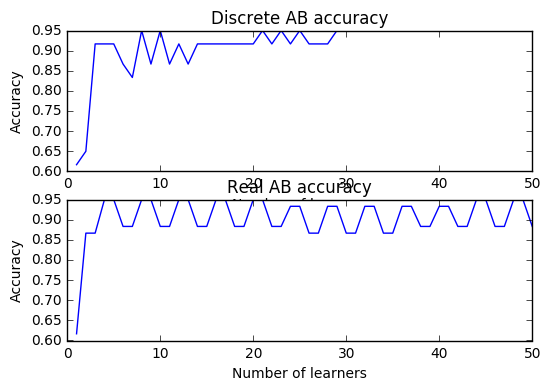

In [24]:
acc_AB_D_evol=[acc for acc in AB_D.staged_score(X_test, Y_test)]
acc_AB_R_evol=[acc for acc in AB_R.staged_score(X_test, Y_test)]


# Ploting results
rang_n_learners=np.arange(50)+1
plt.figure()
plt.subplot(211)
plt.plot(rang_n_learners,acc_AB_D_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Discrete AB accuracy')
plt.subplot(212)
plt.plot(rang_n_learners,acc_AB_R_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Real AB accuracy')
plt.show()


If you want, you can check the following scikit-learn [example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html) where the performance of different ensembles over the Iris dataset is analyzed. 